# Fashion-MNIST Using OpenAI's ChatGPT
Fourth in this series. Trying to improve accuracy using only the OpenAI ChatGPT.

In [1]:
# Import TensorFlow and other libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the class names for the Fashion-MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Split the training data into training and validation sets
x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

# Normalize the pixel values
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [13]:
# Import the layers you need
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add
from tensorflow.keras.models import Model

# Define the input tensor
inputs = Input(shape=(28, 28, 1))

# Define the first convolutional layer
x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)

# Define the first pooling layer
x = MaxPooling2D((2, 2), padding='same')(x)

# Define the second convolutional layer
y = Conv2D(64, (3, 3), padding='same', activation='relu')(x)

# Define the second pooling layer
y = MaxPooling2D((1, 1), padding='same')(y)

# Add the output of the first convolutional layer to the output of the second convolutional layer
z = Add()([x, y])

# Define the third convolutional layer
z = Conv2D(128, (3, 3), activation='relu')(z)

# Define the fourth convolutional layer
z = Conv2D(128, (3, 3), activation='relu')(z)

# Define the fifth convolutional layer with more kernels
z = Conv2D(256, (3, 3), activation='relu')(z)

# Define the third pooling layer
z = MaxPooling2D((2, 2))(z)

# Flatten the output of the third pooling layer
z = Flatten()(z)

# Define the dense layer
z = Dense(512, activation='relu')(z)

# Define the output layer
outputs = Dense(10, activation='softmax')(z)

# Define the model
model = Model(inputs, outputs)


In [14]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(x_train, y_train, verbose=2, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1719/1719 - 10s - loss: 0.2424 - accuracy: 0.9111 - val_loss: 0.2681 - val_accuracy: 0.9042 - 10s/epoch - 6ms/step
Epoch 2/20
1719/1719 - 9s - loss: 0.2067 - accuracy: 0.9237 - val_loss: 0.2691 - val_accuracy: 0.9059 - 9s/epoch - 5ms/step
Epoch 3/20
1719/1719 - 9s - loss: 0.1854 - accuracy: 0.9321 - val_loss: 0.2486 - val_accuracy: 0.9168 - 9s/epoch - 5ms/step
Epoch 4/20
1719/1719 - 9s - loss: 0.1682 - accuracy: 0.9384 - val_loss: 0.2466 - val_accuracy: 0.9123 - 9s/epoch - 5ms/step
Epoch 5/20
1719/1719 - 9s - loss: 0.1511 - accuracy: 0.9429 - val_loss: 0.2337 - val_accuracy: 0.9185 - 9s/epoch - 5ms/step
Epoch 6/20
1719/1719 - 9s - loss: 0.1315 - accuracy: 0.9521 - val_loss: 0.2509 - val_accuracy: 0.9181 - 9s/epoch - 5ms/step
Epoch 7/20
1719/1719 - 9s - loss: 0.1139 - accuracy: 0.9573 - val_loss: 0.2530 - val_accuracy: 0.9149 - 9s/epoch - 5ms/step
Epoch 8/20
1719/1719 - 9s - loss: 0.1000 - accuracy: 0.9626 - val_loss: 0.2660 - val_accuracy: 0.9169 - 9s/epoch - 5ms/step
Epoch 

In [19]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Print the test loss and accuracy
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Test loss: 0.43579810857772827
Test accuracy: 0.9199000000953674


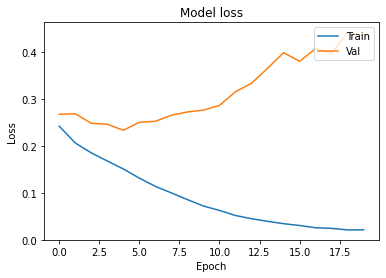

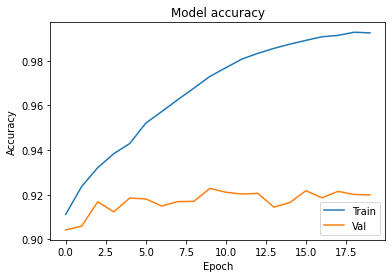

In [21]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


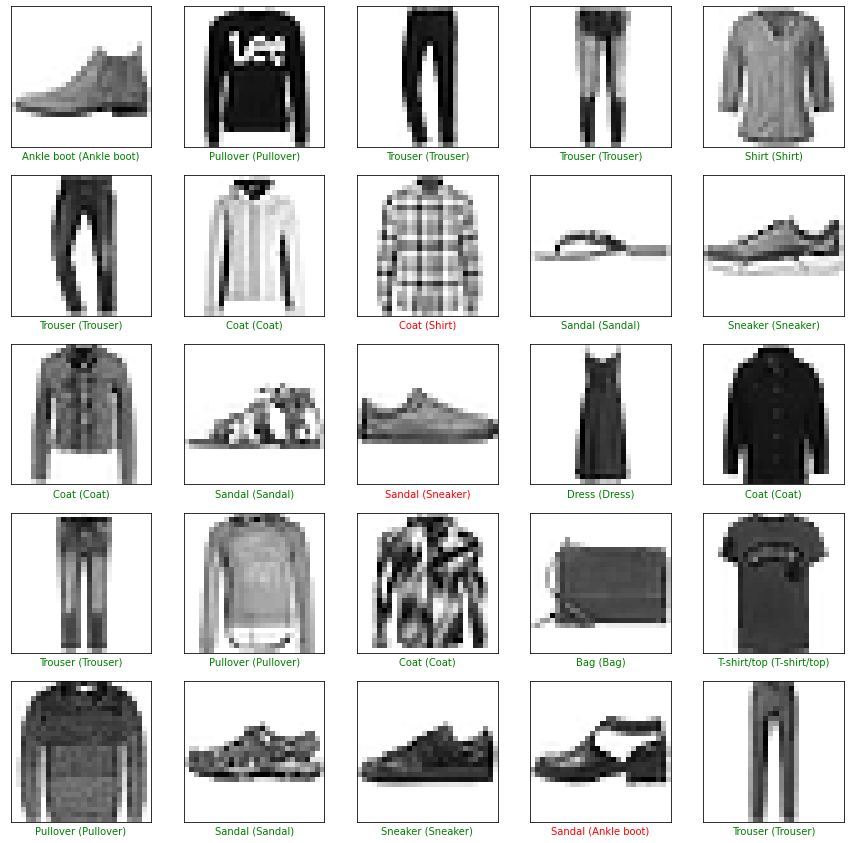

In [22]:
# Make predictions on the test data
predictions = model.predict(x_test)

# Plot the first 25 test images with their predicted labels
plt.figure(figsize=(15,15))  # Set the figure size to 15 inches by 15 inches
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                  class_names[true_label]),
                                  color=color)
plt.show()


01 was 87%, 02 was 90%, 03 was 91%, and after 45 minutes of fighting OpenAI's ChatGPT I finally got it to 92% accuracy on the Test data.

This was a frustrating one. Took a very long time.

Are coders doomed? Not yet. It would have taken me less than 5 minutes to do what took 45 minutes relying on pure copy and paste from OpenAI's ChatGPT.